In [27]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte
import scipy.interpolate as interpol
import scipy.optimize as opt

import axion_mass
import g_star
import eom_solver
import density_plot
from config import plot_path, model

eom_solver = importlib.reload(eom_solver)
density_plot = importlib.reload(density_plot)

m_a_fn = axion_mass.m_a_shellard
g_model = g_star.borsamyi_table

In [34]:
%%time
theta_i_s, f_a_s, Omega_a_h_sq = \
    eom_solver.compute_density_parameter((1e-5, np.pi), (1e9, 1e19), m_a_fn, g_model, N=(40,40))

ssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss

/usr/local/lib/python3.6/dist-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: larger nsteps is needed
  self.messages.get(istate, unexpected_istate_msg)))


sssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssCPU times: user 1.08 s, sys: 610 ms, total: 1.69 s
Wall time: 11min 10s


In [44]:
np.savez("sim_shellard_borsamyi_40x40.npz", Omega_a_h_sq=Omega_a_h_sq, theta_i_s=theta_i_s, f_a_s=f_a_s)

/home/janik/Documents/bachelor/Src/density_plot.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(f_a / 1e9, theta_i, np.log10(Omega_a_h_sq))


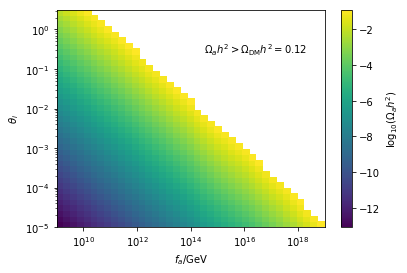

In [51]:
# plt.figure(figsize=(20,10))
density_plot.plot_density(theta_i_s, f_a_s, Omega_a_h_sq, plot_type="pcolormesh")

## R_a

In [55]:
R_a = Omega_a_h_sq / model.Omega_DM_h_sq
R_a_avg = 1 / (theta_i_s[-1] - theta_i_s[0]) * inte.simps(R_a, theta_i_s, axis=0)

Text(0,0.5,'$\\theta_0$')

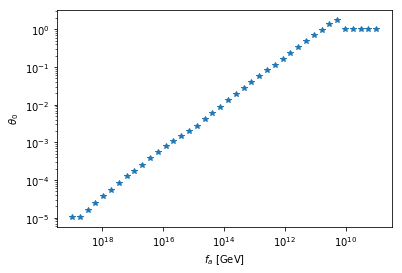

In [56]:
def solve_inital_theta(i, f_a):
    R_a_interp = interpol.interp1d(theta_i_s, R_a[:, i], bounds_error=False)
    try:
        return opt.root(lambda theta: R_a_interp(theta) - 1.0, 1.0).x[0]
    except ValueError as e:
        print(e.args)
        return np.NAN

theta_0 = np.array([solve_inital_theta(i, f_a) for i, f_a in enumerate(f_a_s)])

# print(theta_0)

plt.loglog(f_a_s / 1e9, theta_0, "*")
plt.gca().invert_xaxis()
plt.xlabel("$f_a$ [GeV]")
plt.ylabel(r"$\theta_0$")